# Single Digit Classifer

Image classifier that can recognize single digits (black font) on a white background. Trained on the MNIST database

In [1]:
from fastai.vision.all import *

## Creating the Path to MNIST

In [2]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

## Creating the DataBlock

In [3]:
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW),
                          CategoryBlock),
                  get_items = get_image_files,
                  splitter = GrandparentSplitter(train_name='training',
                                                 valid_name='testing'),
                  get_y = parent_label,
                  item_tfms=Resize(40),
                  batch_tfms=aug_transforms(size=28, min_scale=0.75))

## Creating the DataLoaders

In [4]:
dls = mnist.dataloaders(path)

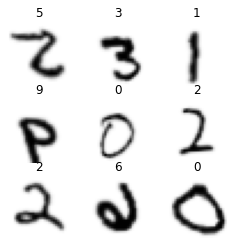

In [5]:
dls.show_batch(max_n=9, figsize=(4,4))

## Creating the Learner

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


## Begin training the model

In [7]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.868676,0.682589,0.230300,01:12


epoch,train_loss,valid_loss,error_rate,time
0,0.230179,0.149643,0.047300,01:21
1,0.134412,0.098126,0.033100,01:23
2,0.115097,0.076236,0.026100,01:22
3,0.078528,0.046868,0.015200,01:22
4,0.050885,0.040360,0.013700,01:21
5,0.052479,0.037728,0.012900,01:21


## Graph the loss

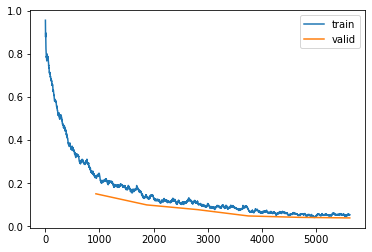

In [8]:
learn.recorder.plot_loss()

## Export the model

In [9]:
learn.export('digit.pkl')